In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits import mplot3d

In [2]:
r = pd.read_csv("../output/r.csv", header=None)
annual_step = 52 # weekly
weeks_quarter = 13 # weeks every quarter
r

,0,1,2,3,4,5,6,7,8,9,...,95,96,97,98,99,100,101,102,103,104
0,0,0.018079,0.019192,0.025284,0.003945,0.056865,0.021179,0.015876,0.020666,-0.014946,...,7.111106,7.381516,8.752506,8.772783,9.825450,10.946502,11.087313,12.067835,12.643733,13.738622
1,0,0.018079,0.015700,0.010495,0.009852,0.028832,0.026866,-0.027081,-0.005747,-0.023606,...,13.387436,13.780896,14.325311,14.429057,14.444898,14.259960,14.600566,14.872200,15.816849,15.007590
2,0,0.018079,0.021804,0.042888,0.035185,0.009204,-0.013520,-0.042291,-0.039584,-0.084967,...,15.315480,16.234837,17.089293,17.771471,18.399051,18.972937,19.817526,19.626110,20.883776,21.644446
3,0,0.018079,0.013389,0.020724,0.016215,0.008893,0.034976,0.075264,0.062527,0.044887,...,11.420345,11.394571,12.169795,12.594433,13.527107,14.861615,15.193339,15.666007,15.690511,16.891424
4,0,0.018079,0.014498,-0.000502,0.005959,0.037166,0.055398,0.055308,0.031297,-0.024022,...,16.373379,16.842504,17.151333,17.530026,17.897184,18.259203,18.565416,19.673702,19.804664,19.954003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0.018079,0.025261,0.021477,0.012198,0.037142,0.052554,0.112325,0.134917,0.172554,...,13.048530,13.506034,13.788148,13.951645,14.332941,15.420721,15.351881,16.179628,17.205248,18.109386
96,0,0.018079,0.015434,0.011232,0.005997,0.000347,-0.028590,-0.062697,-0.073801,-0.109426,...,12.718243,13.324580,13.988261,14.379772,14.031200,14.444793,14.994693,15.985197,16.369746,16.913248
97,0,0.018079,0.018033,0.001895,-0.003316,-0.010643,-0.011205,-0.005841,0.036796,0.007888,...,8.165768,8.564007,8.751519,9.487211,10.319278,11.060629,12.177318,12.404063,12.576056,13.737604
98,0,0.018079,0.016409,0.018094,0.027187,0.027793,0.037102,0.109084,0.026285,0.032542,...,9.955635,10.366673,10.912199,12.075366,12.847100,13.843466,14.594419,15.277452,15.237705,16.459693


In [3]:
with open('../output/computedVol.json') as f:
    computed_vol = json.load(f)
with open('../data/swaption_vol.json') as f:
    market_vol = json.load(f)

min_quote = min(min(computed_vol['quote']), min(market_vol['quote']))*1e4
max_quote = max(max(computed_vol['quote']), max(market_vol['quote']))*1e4

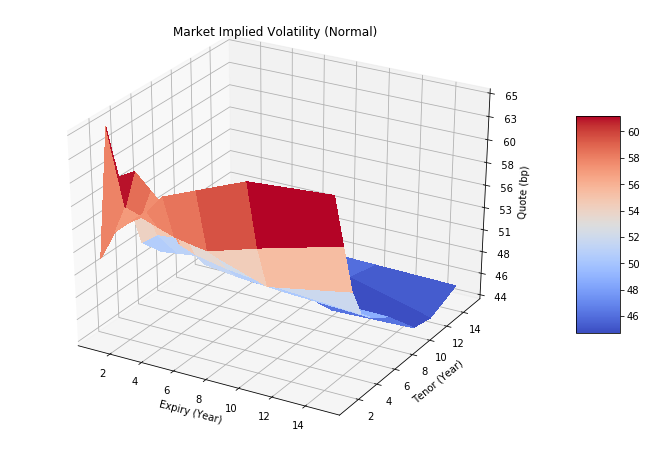

In [4]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(12, 8))
X = market_vol['expiry']
Y = market_vol['tenor']
# X = market_vol['tenor']
# Y = market_vol['expiry']
X, Y = np.meshgrid(X, Y) # shape =  len(Y), len(x)
Z_market = np.array(market_vol['quote']).reshape(market_vol['expiry_size'], market_vol['tenor_size'], order='F')
# Z = np.array(market_vol['quote']).reshape(market_vol['tenor_size'], market_vol['expiry_size'])
Z_market = Z_market.transpose()
Z_market *= 1e4 # (bp)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z_market, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(Z_market.min(), Z_market.max())
# ax.set_zlim(min_quote, max_quote)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter(FormatStrFormatter('%4.0d'))
ax.set_xlabel('Expiry (Year)')
ax.set_ylabel('Tenor (Year)')
ax.set_zlabel('Quote (bp)')
ax.set_title('Market Implied Volatility (Normal)')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


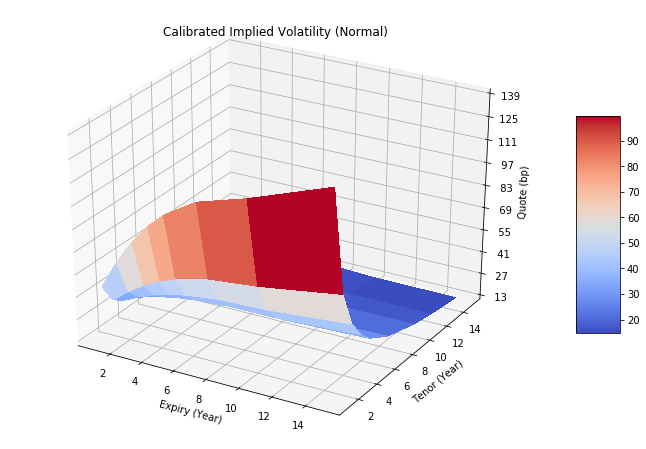

In [5]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(12, 8))
X = computed_vol['expiry']
Y = computed_vol['tenor']
# X = computed_vol['tenor']
# Y = computed_vol['expiry']
X, Y = np.meshgrid(X, Y) # shape =  len(Y), len(x)
Z_computed = np.array(computed_vol['quote']).reshape(computed_vol['expiry_size'], computed_vol['tenor_size'], order='F')
# Z = np.array(computed_vol['quote']).reshape(computed_vol['tenor_size'], computed_vol['expiry_size'])
Z_computed = Z_computed.transpose()
Z_computed *= 1e4 # (bp)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z_computed, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(Z_computed.min(), Z_computed.max())
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter(FormatStrFormatter('%4.0d'))
ax.set_xlabel('Expiry (Year)')
ax.set_ylabel('Tenor (Year)')
ax.set_zlabel('Quote (bp)')
ax.set_title('Calibrated Implied Volatility (Normal)')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


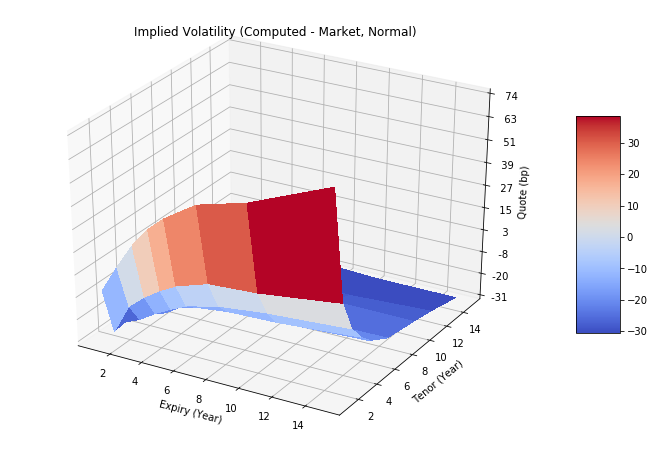

In [6]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(12, 8))
dz = Z_computed - Z_market
# Plot the surface.
surf = ax.plot_surface(X, Y, dz, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(dz.min(), dz.max())
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter(FormatStrFormatter('%4.0d'))
ax.set_xlabel('Expiry (Year)')
ax.set_ylabel('Tenor (Year)')
ax.set_zlabel('Quote (bp)')
ax.set_title('Implied Volatility (Computed - Market, Normal)')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


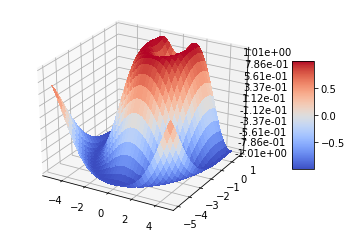

In [7]:
# 3D plot example



fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 1, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter(FormatStrFormatter('%1.2e'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


In [8]:
market_vol

{'expiry_size': 8,
 'tenor_size': 9,
 'expiry': [1.0, 2.0, 3.0, 4.0, 5.0, 7.0, 10.0, 15.0],
 'tenor': [1.0, 2.0, 3.0, 4.0, 5.0, 7.0, 10.0, 12.0, 15.0],
 'quote': [0.005269650941616,
  0.00559415455899,
  0.005738775816108,
  0.005875295283538,
  0.006067420038874,
  0.006206746498912,
  0.006415176094446,
  0.00647684397967,
  0.006557024784882,
  0.005769887459108,
  0.005710218772324,
  0.005650703692152,
  0.005589420313622,
  0.005526759736926,
  0.005680360086114,
  0.00590730666199,
  0.005978311091448,
  0.00607447452642,
  0.005907281807064,
  0.005743863467652,
  0.005562993588878,
  0.00538347162027,
  0.005209627317916,
  0.0053666828152,
  0.005595134555694,
  0.00563898078588,
  0.005695367382838,
  0.00533297878553,
  0.005262515927202,
  0.005190630309164,
  0.005126512439268,
  0.005060993971176,
  0.005151599808102,
  0.00527791195158,
  0.005292957111618,
  0.005312374655728,
  0.005080751846114,
  0.00503604138651,
  0.004995580408964,
  0.004951553929508,
  0.004909

In [9]:
Z

array([[ 0.70886129,  0.57562789,  0.42921793,  0.27541086,  0.11965158,
        -0.03317922, -0.17893857, -0.31433407, -0.43697552, -0.54536893,
        -0.63885987, -0.7175353 , -0.7820949 , -0.83370323, -0.87383376,
        -0.90411471, -0.92618484, -0.94156548, -0.95155293, -0.9571338 ,
        -0.95892427, -0.9571338 , -0.95155293, -0.94156548, -0.92618484,
        -0.90411471, -0.87383376, -0.83370323, -0.7820949 , -0.7175353 ,
        -0.63885987, -0.54536893, -0.43697552, -0.31433407, -0.17893857,
        -0.03317922,  0.11965158,  0.27541086,  0.42921793,  0.57562789],
       [ 0.57562789,  0.4208019 ,  0.2570234 ,  0.09046523, -0.07324847,
        -0.22926849, -0.37368016, -0.50359342, -0.61716461, -0.71355591,
        -0.79284159, -0.85587291, -0.90411471, -0.9394669 , -0.96408345,
        -0.98019913, -0.98997268, -0.99535163, -0.99796201, -0.99902398,
        -0.99929279, -0.99902398, -0.99796201, -0.99535163, -0.98997268,
        -0.98019913, -0.96408345, -0.9394669 , -0.

In [10]:
Y[[0,1]]

array([[-5.  , -5.  , -5.  , -5.  , -5.  , -5.  , -5.  , -5.  , -5.  ,
        -5.  , -5.  , -5.  , -5.  , -5.  , -5.  , -5.  , -5.  , -5.  ,
        -5.  , -5.  , -5.  , -5.  , -5.  , -5.  , -5.  , -5.  , -5.  ,
        -5.  , -5.  , -5.  , -5.  , -5.  , -5.  , -5.  , -5.  , -5.  ,
        -5.  , -5.  , -5.  , -5.  ],
       [-4.75, -4.75, -4.75, -4.75, -4.75, -4.75, -4.75, -4.75, -4.75,
        -4.75, -4.75, -4.75, -4.75, -4.75, -4.75, -4.75, -4.75, -4.75,
        -4.75, -4.75, -4.75, -4.75, -4.75, -4.75, -4.75, -4.75, -4.75,
        -4.75, -4.75, -4.75, -4.75, -4.75, -4.75, -4.75, -4.75, -4.75,
        -4.75, -4.75, -4.75, -4.75]])

In [11]:
np.sqrt(25+4.75**2)

6.896557112066861

In [12]:
np.sqrt(5**2 + 4.75**2)

6.896557112066861

In [13]:
R.shape # (Y,X)

(24, 40)